In [9]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import random
import time
import json
import nltk
from nltk.util import ngrams
from collections import Counter
import spacy
nlp = spacy.load("en_core_web_md", disable = ['tagger'])

from scripts import utils
from scripts import documents as docs
from scripts import comparisons 
from scripts import comparisonsmachine as machine

data_folder = "data"
article_files = ["articles2019-06-01_" + str(i) + "-" + str(i + 5000) + ".csv" for i in range(0, 100000, 5000)]
article_files.append("articles2019-06-01_100000-100755.csv")
# article_df = [utils.readArticles(os.path.join(data_folder, file)) for file in article_files]
# article_df = pd.concat(article_df)

article_df = pd.read_pickle(os.path.join(data_folder, "article_df_20190601"))
article_df = article_df.reset_index(drop = True)

event_names = np.unique(article_df["event"].dropna())

# events = [event for event in np.unique(article_df["event"]) if not np.isnan(event)]
event_path = os.path.join(data_folder, "eventDict2019-06-01.json")
with open(event_path, encoding = "utf8") as json_file:
    events = json.load(json_file)
print(events.keys())
article_df.head(3)

para_sep = "\n"
dd = comparisons.DuplicationDetection()

dict_keys(['singletons', 'incompleteFingerprints', 'algoGroups', 'events', 'wordDict', 'entityDict'])


In [12]:
n = 500
sample_good = random.sample(list(article_df.loc[article_df["paywall"] == 0, "id"]), n)
sample_bad = random.sample(list(article_df.loc[article_df["paywall"] > 0, "id"]), n)

for i in sample_good[0:5]:
    print("INVALID" if article_df.loc[i, "paywall"] else "ARTICLE")
    print("\n<br>\n".join(article_df.loc[article_df["id"] == i, "text"].iloc[0].split(para_sep)), "\n\n\n______\n\n\n")

ARTICLE
Hoopfest deadline passed, but 50 teams can still get in 
<br>
 UPDATED: Fri., May 31, 2019, 10:12 p.m. 
<br>
 Hoopfest participants play their 3-on-3 basketball games along West Main Street in downtown Spokane on  July 1, 2018. (Colin Mulvany / The Spokesman-Review) 
<br>
 If you haven’t registered for Hoopfest already, don’t count on getting in. 
<br>
 Don’t rule it out, either. 
<br>
 Registration closed Friday for the 30th annual 3-on-3 basketball tournament in downtown Spokane, but the June 29-30 event still needs 50 teams to round out various brackets. 
<br>
 Hoopfest’s website (SpokaneHoopfest.net) is shutting down its online registration page on Monday at 11:59 p.m., according to Hoopfest director Matt Santangelo. Teams that sign up before that deadline still have a chance to play. 
<br>
 “Registration is over, but there’s always a few brackets that end up needing teams,” Santangelo said. “So if you still want to play, there’s a chance you can still get in, but it needs 

 ___ 


______



ARTICLE
Don't have an account? Sign Up Today 
<br>
 My Account 
<br>
 Some clouds. Low 54F. Winds NNE at 5 to 10 mph.. 
<br>
 Tonight 
<br>
 Some clouds. Low 54F. Winds NNE at 5 to 10 mph. 
<br>
 Updated: June 1, 2019 @ 9:50 pm 
<br>
 Today In History, June 1: Marilyn Monroe 
<br>
 15 hrs ago 
<br>
 Today is Saturday, June 1. 
<br>
 Today's Highlights in History: 
<br>
 In 1926, actress Marilyn Monroe was born Norma Jeane Mortenson in Los Angeles. 
<br>
 AP 
<br>
 1939: HMS Thetis 
<br>
 In 1939, the British submarine HMS Thetis sank during a trial dive off North Wales with the loss of 99 lives. 
<br>
 AP 
<br>
 1939: Max Baer & Lou Nova 
<br>
 In 1939, Lou Nova (right) defeated Max Baer (left) at Yankee Stadium in the first U.S. televised heavyweight prizefight. 
<br>
 AP 
<br>
 1967: "Sgt. Pepper's Lonely Hearts Club Band" 
<br>
 In 1967, the Beatles album "Sgt. Pepper's Lonely Hearts Club Band" was released, as was David Bowie's debut album, eponymously titled "Dav

In [20]:
article_dict = dd.dict_by_ids(article_df, sample_good + sample_bad, para_sep = "\n")
for i in sample_good[0:5]:
    print("INVALID" if article_df.loc[i, "paywall"] else "ARTICLE")
    print("\n\t".join(article_dict[i].get_sentences()), "\n\n\n")

ARTICLE
Hoopfest deadline passed, but 50 teams can still get in
	 UPDATED: Fri.
	, May 31, 2019, 10:12 p.m.
	 Hoopfest participants play their 3-on-3 basketball games along West Main Street in downtown Spokane on  July 1, 2018.
	(Colin Mulvany / The Spokesman-Review)
	 If you haven’t registered for Hoopfest already, don’t count on getting in.
	 Don’t rule it out, either.
	 Registration closed Friday for the 30th annual 3-on-3 basketball tournament in downtown Spokane, but the June 29-30 event still needs 50 teams to round out various brackets.
	 Hoopfest’s website (SpokaneHoopfest.net) is shutting down its online registration page on Monday at 11:59 p.m., according to Hoopfest director Matt Santangelo.
	Teams that sign up before that deadline still have a chance to play.
	 “
	Registration is over, but there’s always a few brackets that end up needing teams,” Santangelo said.
	“
	So if you still want to play, there’s a chance you can still get in, but it needs to be in by Monday.
	”
	 H

	He's a mystery to everybody, apparently. 



ARTICLE
Don't have an account?
	Sign Up Today
	 Some clouds.
	Low 54F. Winds NNE at 5 to 10 mph..
	Low 54F. Winds NNE at 5 to 10 mph.
	 Updated: June 1, 2019 @ 9:50 pm
	 Today In History, June 1: Marilyn Monroe
	 Today is Saturday, June 1.
	 Today's Highlights in History:
	 In 1926, actress Marilyn Monroe was born Norma Jeane Mortenson in Los Angeles.
	 In 1939, the British submarine HMS Thetis sank during a trial dive off North Wales with the loss of 99 lives.
	 1939: Max Baer & Lou Nova
	 In 1939, Lou Nova (right) defeated Max Baer (left) at Yankee Stadium in the first U.S. televised heavyweight prizefight.
	 1967:
	"Sgt.
	Pepper's Lonely Hearts Club Band"
	 In 1967, the Beatles album "Sgt.
	Pepper's Lonely Hearts Club Band" was released, as was David Bowie's debut album, eponymously titled "David Bowie.
	"
	 In 1968, author-lecturer Helen Keller, who earned a college degree despite being blind and deaf almost her entire life, died in Wes

In [15]:
for i in sample_good[0:5]:
    print(i, "INVALID" if article_df.loc[i, "paywall"] else "ARTICLE")
    for i, para in enumerate(str(article_dict[i]).split("\n")):
        print(f"P{i}: {para}")
    print("_____\n")

26945 ARTICLE
P0: Hoopfest deadline passed, but 50 teams can still get in
P1:  UPDATED: Fri. , May 31, 2019, 10:12 p.m.
P2:  Hoopfest participants play their 3-on-3 basketball games along West Main Street in downtown Spokane on  July 1, 2018. (Colin Mulvany / The Spokesman-Review)
P3:  If you haven’t registered for Hoopfest already, don’t count on getting in.
P4:  Don’t rule it out, either.
P5:  Registration closed Friday for the 30th annual 3-on-3 basketball tournament in downtown Spokane, but the June 29-30 event still needs 50 teams to round out various brackets.
P6:  Hoopfest’s website (SpokaneHoopfest.net) is shutting down its online registration page on Monday at 11:59 p.m., according to Hoopfest director Matt Santangelo. Teams that sign up before that deadline still have a chance to play.
P7:  “ Registration is over, but there’s always a few brackets that end up needing teams,” Santangelo said. “ So if you still want to play, there’s a chance you can still get in, but it needs t

P22:  All indications were that the shooter purchased the weapons legally, one in 2016 and one in 2018, Benedict said. The police chief said at least one had a noise suppressor.
P23:  Craddock, 40, graduated from Denbigh High School in nearby Newport News in 1996 and joined the Army National Guard, according to a newspaper clip from the time. He received basic military training and advanced individual training at Fort Sill, Oklahoma. He later graduated from Old Dominion University with a bachelor's degree in civil engineering.
P24:  Scott said he worked in a different division from Craddock, whom he described as quiet, polite and a "nice guy. Scott said he thought Craddock was in good standing at work and had never heard negative reports about him.
P25:  A handwritten note was posted Saturday at the suspect's home expressing condolences to the shooting victims on behalf of his family.
P26:  Hundreds of people attended Saturday prayer vigils for the dead. Scott said he, his wife and sev

In [16]:
for i in sample_bad:
    print("INVALID" if article_df.loc[i, "paywall"] else "ARTICLE")
    print(article_dict[i], "\n\n\n")

INVALID
Please register or log in first. 



INVALID
 Covers Media Group Ltd.                                   All Rights Reserved.     



INVALID
 It's free and you can opt out at any time. For more information, please see our Privacy Policy . 



INVALID
Newsmax, Moneynews, Newsmax Health, and Independent. American. are registered trademarks of Newsmax Media, Inc. Newsmax TV, and Newsmax World are trademarks of Newsmax Media, Inc. 



INVALID
Temporary Bond Set on 05/31/2019 



INVALID
Let’s Meditate is an app for users who want to reduce stress, focus on good things in their lives, build gratitude, embrace change, and remove negative thoughts through guided meditation.
 May 31st, 20:40 GMT 



INVALID
Newsmax, Moneynews, Newsmax Health, and Independent. American. are registered trademarks of Newsmax Media, Inc. Newsmax TV, and Newsmax World are trademarks of Newsmax Media, Inc. 



INVALID
Eugene, Ore. – Saturday, June 1, 2019
 Dispute on Saturday, June 1, 2019 @ 7:23 a.m. PDT
 P

 For account information and support, contact us today . 



INVALID
 An email will be sent to the address that we have on file with your username information. 



INVALID
"F" key: Enter/Exit full screen.
 Tab key: Navigate to clickable items, menus and player controls.
 Enter or return key: Activates focused link or control.
 Escape key: Closes any open menu.
 Right and left arrow keys: seek the player forward or back 15 seconds.
 Up and down arrow keys: adjust the player volume up or down 10 percent.
 Arrow keys when menus are open : Navigate the focused menu. 



INVALID
 Disabling adblock for a specific site just takes a couple of clicks.   
 Lew Rockwell subscribe to this author via RSS 



INVALID
Please register or log in first. 



INVALID
Please register or log in first. 



INVALID
 Covers Media Group Ltd.                                   All Rights Reserved.     



INVALID
 10,000 Episodes On Demand
 Ready. Set. Binge!     Learn more
 Stream Live TV 24/7
 Stream your local

INVALID
 Improve this venue listing
 What can we do for you?
 Thank you for your input.   



INVALID
Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts
  Are you over eighteen and willing to see adult content? 



INVALID
 



INVALID
 Welcome to E-Edition Plus.
 The following pages are a new section of additional content not included in the newspaper, available exclusively to News+ Platinum members.
 Already a member? Login or Activate your account.
 You've reached the end of the standard E-Edition.
 The following E-Edition Plus pages are a new section of additional content not included in the newspaper, available exclusively to News+
 Call 877-509-6397 to upgrade today. 



INVALID
 Damion Gerade Weir, a 33-year-old black male , died Friday, May 24, after being shot in Hyde Park , according to Los Angeles County Medical Examiner-Coroner's records. 



INVALID
 Big hits and the best new music.
 Jax Jones & Martin Solveig Present Europa
 All D

 BREAKING | Grammy-nominated rapper and Houston icon Bun B shot a robber at his home Tuesday night, police said. Bun B, whose real name is Bernard Freeman , fired after a masked man pulled a gun on his wife, Queenie , when she answered the door. 



INVALID
 meet the mother of the forest the grandidier baobab this species of baobab tree is found only on madagascar in
 Meet the “mother of the forest,” the Grandidier baobab. This species of baobab tree is found only on Madagascar , in dry deciduous forests. It can grow as much as 98 ft (30 m) tall & its trunk can have a diameter of up to 9.8 ft (3 m). [📸: Bernard Gagnon ] 



INVALID
Sunny, along with a few afternoon clouds. Slight chance of a rain shower. High 56F. Winds NW at 15 to 25 mph.
 Clear. Low 39F. Winds NW at 10 to 20 mph. 



INVALID
Newsmax, Moneynews, Newsmax Health, and Independent. American. are registered trademarks of Newsmax Media, Inc. Newsmax TV, and Newsmax World are trademarks of Newsmax Media, Inc. 



INVALID
 Cl

 I agree to receive communications from the Winnipeg Free Press, even if I have previously opted out. I may unsubscribe at any time by clicking the unsubscribe link on the emails. 



INVALID
 Thank you for reporting this station. We will review the data in question.
 You are about to report this weather station for bad data. Please select the information that is incorrect. 



INVALID
Newsmax, Moneynews, Newsmax Health, and Independent. American. are registered trademarks of Newsmax Media, Inc. Newsmax TV, and Newsmax World are trademarks of Newsmax Media, Inc. 



INVALID
01 June 2019 at 4:26 AM
 Katie Holmes Braves the Rain While Taking a Stroll in NYC
 Kit Harington was spotted outside of his wellness center - TMZ
 Taylor Swift is making another political statement - Just Jared Jr
 Khloe Kardashian is clapping back about claims she's dating Scott Disick - TooFab
 The cast of All That had no idea what they were auditioning for - Just Jared Jr 



INVALID
 A password will be e-mailed

 Scientists tasked with reviewing government plans to lift protections for gray wolves across most of the U.S. said in a report released Friday that the proposal has numerous factual errors and other problems. 



INVALID
Thunderstorms likely. High 73F. Winds WNW at 10 to 15 mph. Chance of rain 100%..
 Partly cloudy. Low 51F. Winds NNW at 5 to 10 mph.
 Updated: June 1, 2019 @ 1:28 am 



INVALID
 OPEN HOUSES Win $500 THE MARKET FOR MORE 349 900 LANATION CLDE MARINERS VILLAGE OREST 363 500 DOLPHIN BAY KURE BEACH 499,900  OPEN HOUSES Win $500 FOR MORE 349 900 LANATION CLDE MARINERS VILLAGE OREST 363 500 DOLPHIN BAY KURE BEACH 499,900 



INVALID
Never Miss a Cruise Deal
 Sign up for special offers direct to your inbox 



INVALID
"F" key: Enter/Exit full screen.
 Tab key: Navigate to clickable items, menus and player controls.
 Enter or return key: Activates focused link or control.
 Escape key: Closes any open menu.
 Right and left arrow keys: seek the player forward or back 15 seconds.

 Get full access to Centre Daily Times content across all your devices. 



INVALID
Copyright © 2019 Minor League Baseball.
 Minor League Baseball trademarks and copyrights are the property of Minor League Baseball. All Rights Reserved. 



INVALID
 Sunshine and clouds mixed. A stray shower or thunderstorm is possible. High 79F. Winds light and variable..
 Partly cloudy skies. Low 59F. Winds light and variable.
 Updated: June 1, 2019 @ 1:48 pm 



INVALID
 Glow Martini Lounge: A cocktail oasis in a Bonney Lake strip mall desert | Tacoma News Tribune
 March 13, 2019 02:55 PM
 Tucked into a typical suburban strip mall in Bonney Lake is a new martini bar called Glow Martini Lounge. The lounge opened in mid-February with a lengthy list of classic cocktails, signature cocktails, martinis and an array of edibles. 



INVALID
Man dead, woman injured in Kirkland; man arrested | The Olympian
 Man dead, woman injured in Kirkland; man arrested
 Police say officers have arrested a man in connectio

 Otherwise, please return to the page you were at before. 



INVALID
Original Poster-6 points · 27 days ago
 I did this many times. River. See. Tap water. Just make the case clear! 



INVALID
 The latest five minute news bulletin from BBC World Service. 



INVALID
Jason Vargas strikes out six across seven innings of work, allowing one run on six hits and three walks in a matchup vs. the Dodgers 



INVALID
Please register or log in first. 



INVALID
 Thank you for reporting this station. We will review the data in question.
 You are about to report this weather station for bad data. Please select the information that is incorrect. 



INVALID
 Meet your future teeth.
 Send us 5 smiling selfies and we'll send you a free 3D teeth model of what your teeth could look like, as well as pricing and treatment length information. Our Instant Preview report is developed by a real dental professional. Insist on a real evaluation, not a five-question survey. 



INVALID
 Thank you for reportin

 What to Read Next 



INVALID
 We have noticed that you are using an ad blocker software.  
 To view this article, you can disable your ad blocker and refresh this page or simply login .
 We only allow registered users to use ad blockers. You can sign up for free by clicking here or you can login if you are already a member. 



INVALID
 Thank you for reporting this station. We will review the data in question.
 You are about to report this weather station for bad data. Please select the information that is incorrect. 



INVALID
CBS News Videos •
 Several Middle East countries held an emergency summit to discuss escalating tensions with Iran. CBS News foreign correspondent Imtiaz Tyab reports from Mecca, Saudi Arabia.
 What to Read Next 



INVALID
Don't have an account? Sign Up Today
 Clear skies. Low 48F. Winds NNW at 10 to 15 mph..
Low 48F. Winds NNW at 10 to 15 mph.
 Updated: June 1, 2019 @ 8:38 pm
 Mandy Urban M ban b an DIAMOND JO APPRECIATES YOUR  rk and dedication! hard work 

 The ozone layer is in trouble again. This time it's because of emissions produced by the manufacturing of foam insulation used in refrigerators and buildings 



INVALID
 3:57 pm PDT, Friday, May 31, 2019
 New York Stock Exchange-listed stocks that have
 percent of change for 2018.
 No securities trading below 1000 shares are included.
 Net and percentage change are the difference be-
 tween last year's closing price and this year's closing.
 Changes for issues added during the year are calcu-
 lated from closing prices on the first trading day. 



INVALID
 We did not find the page you were looking for. Did you type the link correctly?
 We are sorry, but you have reached this page in error.
 Please try the action again and if the problem continues, contact Customer Support . % 3Ca%20href=%22https:/twitter.com/ARizzo44?ref_src=twsrc%5Etfw%22%3E@ARizzo44%3C/a%3E%20likes%20St.%20Louis%20just%20the%20way%20it%20is.%3Ca%20href=%22https://twitter.com/hashtag/TeamRizzo?src=hash&ref_src=twsr

 Doesn't charity begin at home? 



INVALID
Please register or log in first. 



INVALID
Webcam view for Saturday, June 1, 2019
 Your browser does not support the video tag.
 Online: 9:58:58 PM (updated 16 mins ago)
 View all shauntanner's cams 



INVALID
Would you like to receive news alerts from WHIO?
 log in to manage your profile and account
 Why you need to check your credit report every year
 Published: Friday, May 31, 2019 @ 2:20 PM
 By: Craig Johnson         -      Clark.com 



INVALID
Critics blast Attorney General William Barr after statement by former special counsel Robert Mueller 



INVALID
 Published: June 1, 2019
 MLB FAVORITE LINE UNDERDOG National League Milwaukee -180/+165 at Pittsburgh at Cincinnati -125/+115 Washington at St. Louis -130/+120... 



INVALID
 Click "Return" to go back and edit your entry.
 Thank you for signing the Guest Book for Raymond D. Holt.
 All Guest Book entries and photos are reviewed for appropriate content before appearing online. Most e

 The Event Chronicle is a daily alternative news blog for people interested in seeking truth and exploring alternate view points not covered in the mainstream. 



INVALID
Don't have an account? Sign Up Today
 Mostly sunny. A stray shower or thunderstorm is possible. High 89F. Winds WSW at 5 to 10 mph..
 Scattered thunderstorms early, then partly cloudy after midnight. Low 64F. Winds NW at 5 to 10 mph. Chance of rain 40%.
 Updated: June 1, 2019 @ 9:04 am
 Top 10 schedule, results
 1. Edwardsville (11-2) was idle.
 2. Triad (10-5) was idle.
 3. O'Fallon (13-3) lost to Moline (0-0), 1-0 Today.
 4. Alton (11-6) was idle.
 5. Belleville West (8-4) was idle.
 Small school schools - 5/31
Alton Marquette (12-3) was idle.
Columbia (11-5) was idle.
Breese Central (10-2) was idle.
Jerseyville (11-5) was idle.
Dupo (9-4) was idle.
 Large schools have enrollments over 1,000.
 Get the STL High School Sports newsletter! 



INVALID
Crash causes delays on Interstate 77
 Traffic backed up six miles.
 

 Subscribe to Breaking News 



INVALID
Granlund cartoon: D-Day 75th anniversary
 Dave Granlund cartoon on the 75th anniversary of D-Day.
 Never miss a story
 Choose the plan that's right for you.
 Digital access or digital and print delivery. 



INVALID
Don't have an account? Sign Up Today
 Sunny to partly cloudy. High near 90F. Winds WNW at 10 to 15 mph..
 Partly cloudy skies. Low 64F. Winds NNE at 5 to 10 mph.
 Updated: June 1, 2019 @ 11:46 am
 Your comment has been submitted.
 There was a problem reporting this.
 Watch this discussion. Stop watching this discussion.
 Keep it Clean. Please avoid obscene, vulgar, lewd, racist or sexually-oriented language.
 Don't Threaten. Threats of harming another person will not be tolerated.
 Be Truthful. Don't knowingly lie about anyone or anything.
 Be Nice. No racism, sexism or any sort of -ism that is degrading to another person.
 Be Proactive. Use the 'Report' link on each comment to let us know of abusive posts.
 Share with Us. We'd love t

 © 2019 Pregame.com. Pregame.com is located and licensed in Las Vegas, Nevada. 



INVALID
 You don't have permission to access "http://www.usnews.com/news/best-states/new-jersey/articles/2019-06-01/small-plane-makes-emergency-landing-on-beach-no-injuries" on this server. 



INVALID
Please register or log in first. 



INVALID
Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts
 I would have guessed meth based on her face.
 This anti NASA rhetoric is absolutely disheartening. It's literally been a staple of American ingenuity since 1969. John Glenn is rolling in his grave. Those astronauts are fucking military pilots. 



INVALID
Member exclusive by Justin Gonçalves
 Preview this member exclusive
 Shoshana Zuboff is an author, scholar, and professor at Harvard Business School. In this interview for members, Quartz reporter Natasha Frost and Zuboff discuss the ever-expanding threat she sees from surveillance capitalism—her term for the industry 

 I temporary disabled my ig account about 2 months back.   Today I tried logging in again today and it told me "The username you entered doesn't belong to an account".   Has anyone else had this problem/found a solution? 



INVALID
 A mix of clouds and sun. A stray shower or thunderstorm is possible. High near 80F. Winds NW at 5 to 10 mph..
 Mostly clear. Low 52F. Winds SW at 5 to 10 mph.
 Updated: June 1, 2019 @ 2:53 pm 



INVALID
Don't have an account? Sign Up Today
 A clear sky. Low 61F. Winds light and variable..
Winds light and variable.
 Updated: May 31, 2019 @ 10:57 pm
 Cedar Rapids beats Beloit 6-5
 BELOIT, Wis. (AP) -- Jared Akins and Ben Rodriguez scored on an error in the eighth inning, leading the Cedar Rapids Kernels to a 6-5 win over the Beloit Snappers on Friday.
 The play capped a three-run inning and gave the Kernels a 6-4 lead after Andrew Bechtold drew a bases-loaded walk earlier in the inning.
 In the bottom of the eighth, Beloit cut into the deficit on an error t

 Looks like the book you were looking for is currently not in stock with us. Please leave us your email and phone number. We will get back to you as soon as it's available. 



INVALID
 How do I get started?
 Start reading and click on a headline! Yardbarker is free to use.
 What is the Morning Bark?
 The Morning Bark is Yardbarker's must-read, daily email newsletter.   Sign up for the Morning Bark.
 How do I report inappropriate content?
 We rely on the Yardbarker community to report inappropriate content.   Include the url of the article in your email. Please refer to our Terms of Service for more information.
 How do I contact Yardbarker?
 If you have questions, or concerns, please email us at feedback@yardbarker.com . For additional contact information, visit our Contact Us page.
 How can I get a job at Yardbarker?  
 Sports News, Rumors & Quizzes 



INVALID
Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts
 It’s like T-series Vs Pewdiepi

 You can also get an instant mobile notification with our iPhone- or Android app. 



INVALID
Please register or log in first. 



INVALID
The document has moved here .
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 



INVALID
Don't have an account? Sign Up Today 



INVALID
The document has moved here .
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 



INVALID
Baltimore Symphony Orchestra to cut summer’s programming. | Macon Telegraph
 Baltimore Symphony Orchestra to cut summer’s programming.
 The Baltimore Symphony Orchestra says it's eliminating this year's summer programming.
 The Washington Post reports that the orchestra cited $16 million in losses with Thursday's announcement. Orchestra president and chief executive Peter Kjome also said the business model needs to change.
 The orchestra's musicians have been playing without a contract since September. Proposed cuts have been a major issue in stalled contract negotiations.
 The situation epitomizes 

0 of 500 rows completed, 0.07m elapsed
100 of 500 rows completed, 3.88m elapsed
200 of 500 rows completed, 6.63m elapsed
300 of 500 rows completed, 8.80m elapsed
400 of 500 rows completed, 10.70m elapsed


Text(0, 0.5, '% Unique documents')

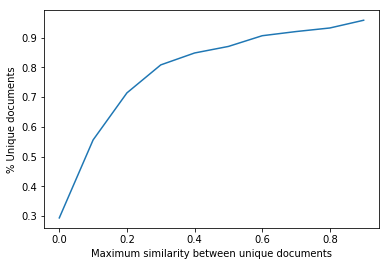

In [92]:
#sample = random.sample(list(article_df["id"]), 50)
sample = sample_good
article_dict = dd.dict_by_ids(article_df, sample)
sim_mat = dd.similarity_mat(article_dict)
plt.plot([i/100 for i in range(0, 100, 10)], [dd.prop_unique_clusters(thresh_same_doc = i/100) for i in range(0, 100, 10)])
plt.xlabel("Maximum similarity between unique documents")
plt.ylabel("% Unique documents")

(array([6046., 1208.,  202.,  156.,  124.,   70.,   18.,   18.,   32.,
         656.]),
 array([0.00168067, 0.10151261, 0.20134454, 0.30117647, 0.4010084 ,
        0.50084034, 0.60067227, 0.7005042 , 0.80033613, 0.90016807,
        1.        ]),
 <a list of 10 Patch objects>)

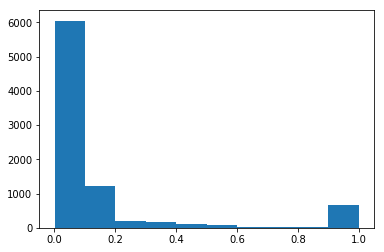

In [93]:
plt.hist(sim_mat[np.where(sim_mat > 0)])

In [34]:
np.where((sim_mat > 0.8) * (sim_mat < 0.9))

(array([  2,  51,  60,  60,  78,  99,  99, 123, 128, 208, 291, 291, 337,
        337, 367, 369, 369, 388, 401, 420, 420, 422, 422, 459, 479, 479,
        486, 499], dtype=int64),
 array([337, 401,  99, 291, 388,  60, 291, 499, 459, 337,  60,  99,   2,
        208, 420, 422, 479,  78,  51, 367, 486, 369, 479, 128, 369, 422,
        420, 123], dtype=int64))

In [94]:
sim_mat[np.where((sim_mat > 0.8) * (sim_mat < 0.9))]

array([0.87208556, 0.88372193, 0.83293651, 0.89885496, 0.84375   ,
       0.84375   , 0.82932197, 0.83333333, 0.83293651, 0.86298437,
       0.84375   , 0.84375   , 0.88110599, 0.86298437, 0.88110599,
       0.86986401, 0.89885496, 0.86643836, 0.81494662, 0.84375   ,
       0.84375   , 0.86643836, 0.81494662, 0.87208556, 0.89840256,
       0.83333333, 0.86986401, 0.82932197, 0.84375   , 0.84375   ,
       0.88372193, 0.89840256])

In [95]:
dd.cluster_articles(sim_mat)
print(Counter(dd.get_cluster_assignments(thresh_same_doc = 0.8)).most_common(10))
clusters = dd.get_cluster_assignments()

[(33, 12), (89, 6), (24, 3), (25, 3), (73, 3), (81, 2), (83, 2), (100, 2), (109, 2), (167, 2)]


In [96]:
good_ids_unique = [sample[np.where(clusters == c)[0][0]] for c in np.unique(clusters)]

In [97]:
len(np.unique(clusters))
texts = [article_df.loc[article_df["id"] == i, "text"].iloc[0] for i in good_ids_unique]

In [98]:
good_texts_df = pd.DataFrame({'id': good_ids_unique, 'text': texts})
good_texts_df["article_prior"] = 1

all_texts_df = pd.concat(texts_df, good_texts_df)

TypeError: first argument must be an iterable of pandas objects, you passed an object of type "DataFrame"

In [108]:
len(good_texts_df), len(texts_df)
all_texts_df = pd.concat([texts_df, good_texts_df])
all_texts_df.to_csv("mturk_text_scrapes.csv", index = False)

In [125]:
random.sample(range(10), 3)

[3, 0, 4]

In [128]:
all_texts_df.iloc[random.sample(range(len(all_texts_df)), 50)].to_csv("mturk_scrapes_sample.csv", index = False)

In [91]:
texts_df = pd.DataFrame({'id': bad_ids_unique, 'text': texts})
texts_df["article_prior"] = -1
texts_df

,id,text,article_prior
0,19389,USAHM Conspiracy News \n Load More Stories \n ...,-1
1,1953,The Clinton High School soccer program is gear...,-1
2,60846,Error 403 : Access Denied \n The access to thi...,-1
3,32894,"• \n May 31, 2019 \n Police believe the 4-year...",-1
4,100726,"Taijeron hits for cycle, sparks Syracuse’s 13-...",-1
5,53530,Tennessean Sports Awards scenes from the red c...,-1
6,35311,Experts list reasons to keep renting \n By KEL...,-1
7,9407,Ithaca Festival 2019 takes over downtown with ...,-1
8,96344,Press J to jump to the feed. Press question ma...,-1
9,10554,© 2019 Patch Media. All Rights Reserved. \n Sw...,-1


In [66]:
for t in texts:
    print(t, "____\n")

USAHM Conspiracy News 
 Load More Stories 
 Categories ____

The Clinton High School soccer program is gearing up for the 9th Annual Darkness Soccer Skills Camp. The camp is set to run from Monday, June 17 through Friday, June 21, 8:30-11:30 a.m daily. It […] 
 Sports ____

Error 403 : Access Denied 
 The access to this location          (/days-gone/File:DG_-_Belknap_023.jpg)         is denied.              
 Otherwise, please return to the page you were at before. ____

• 
 May 31, 2019 
 Police believe the 4-year-old was murdered, and are looking to find her body to give her family closure, Houston authorities said last week. 
 What to Read Next ____

Taijeron hits for cycle, sparks Syracuse’s 13-4 win over Pawtucket 
 Get the top news stories delivered directly to your inbox! 
 Go ____

Tennessean Sports Awards scenes from the red carpet 
 197 PHOTOS ____

Experts list reasons to keep renting 
 By KELSEY SHEEHY - NerdWallet Writer 
 Published: June 1, 2019 
 You have a stable job an

 Comment and Share! ____

 
 Emails will be sent directly from Legacy.com. We respect your privacy and will not sell your information to a third party. You may opt out at any time. See privacy policy for details. 
 Your email was sent successfully. 
 Return to the obituary ____

   
 House and Senate bills 
 Senate Committees and Offices 
 Senate publications, press releases, speeches, videos, and photos 
 The yellow sun icon indicates an item you can track. The red sun icon indicates an item you are tracking. ____

12 victims identified in Virginia Beach shooting 
 12 PHOTOS ____

  
 Thank you for registering! 
 We have sent a confirmation email to {* data_emailAddress *}. Please check your email and click on the link to activate your account. 
 Thank you for registering! 
 We look forward to seeing you on [website] frequently.  
 Click here to return to the page you were visiting. 
 Reset your password ____

37th Annual Walnut Antique Show 
 June 14-15, 2019 8 AM - 5 PM 
 Walnut AMV

 Go ____

White House counsel to leave post 
 Jun 1, 2019 
 White House counsel Emmet Flood, the lawyer who has dealt with the response to special counsel Robert Mueller's probe, will leave now that Mueller's report has been delivered, President Donald Trump announced in a tweet. 
 TownNews.com Content Exchange ____

Close 
 Entry Reminder! 
 You have started an entry for this Guest Book, but it has not been submitted yet. Click "Return" to go back and edit your entry. 
  
 Thank you for signing the Guest Book for Robin Michelle Jordan. 
 All Guest Book entries and photos are reviewed for appropriate content before appearing online. Most entries will appear within 24 hours of being submitted.  
 Share this Guest Book with family and friends. ____

Calgary ·New 
 School of Rock teaches kids how to transform into guitar heroes and make friends 
 School of Rock trains everyone from first-timers to emerging rock stars. The young people who study there says the experience changed them. 
 So

 1-866-321-8726 ____

McKinley Museum to have car show 
  
 Friday 
 May 31, 2019 at 1:08 PM 
 CANTON  Car enthusiasts are invited to the Wm. McKinley Presidential Library & Museum and Yesterday's Classics 18th annual Cruisin' Thru History Antique and Classic Car Show June 22. 
 Registration will take place from 9 a.m. to noon. The show hours are 10 a.m. to 3 p.m. 
 The fee to enter a car is $9 in advance, $12 the day of the show. The first 100 cars registered will receive a unique dash plaque. 
 In addition to vehicles, the event will feature live entertainment, refreshments, door prizes, free admission to the museum, planetarium shows and Discover World demonstrations. For more details, contact Chris at 330-455-7043. 
 Never miss a story 
 Choose the plan that's right for you. 
 Digital access or digital and print delivery. ____

  Please update your billing details here to continue enjoying your subscription.  
 Crackdown on funeral scams by City minister John Glen 
 June 2 2019, 12

 Get full access to Centre Daily Times content across all your devices. ____

@CharlieDaniels 2 days 
 there are a lot of people out there who dont like trump and thats your business but when a political party tur 
 there are a lot of people out there who don’t like Trump , and thats your business, but when a political party turns 100% of their efforts and energy into destroying a duly elected president, there is danger they will destroy anybody who disagrees with them including you and me ____

USAHM Conspiracy News 
 Load More Stories 
 Categories ____

 (NWA Media) 
 All rights reserved.  Please read our Terms of Use or contact us. ____

A 
 A 
 90, retired Pastor, passed Monday, 05/27/2019. Service info: 1PM, Monday 06/03/2019 at Cornerstone Funeral Home Chapel. Family Visitation: 2PM-4PM, Sunday, 06/02/2019 at Cornerstone Funeral Home. Cornerstone Funeral Home & Crematory 
 Published on May 31, 2019 
 Send flowers ____

Preschool Crimson Oklahoma Sooners Destined Short Sleeve T-Sh

 Digital access or digital and print delivery. ____

Penetration is just a hug from the inside. 
 Honestly, taking dick(or giving dick) in the ass as a dude, seems pretty fuckin masculine to me. Nothing about gay sex strikes me as effeminate. Just two hormone laden dudes who love each other so much, that merely embracing one a other is not sufficient as an expression of the intimacy of their relationship. 
 Penetration is just a hug from the inside. 
 3 ____

Maryland Couple Found Dead at Resort in the Dominican Republic 
 Published May 31, 2019 at 11:39 PM | Updated 2 hours ago ____

Events 
 Get Madison Magazine delivered to your office or home. 
 Gift subscriptions now available! ____

 
 It's free and you can opt out at any time. For more information, please see our Privacy Policy . 
 YES, SIGN ME UP! 
 NO THANKS 
 One last thing! ____

International Saturdays 
 Sunday, June 2, 2019, 4:00 AM Google Calendar Yahoo Calendar Aol Calendar Windows Live Calendar Outlook Calendar (iCal) 


 Sports News, Rumors & Quizzes ____

A mainly sunny sky. High 87F. Winds WNW at 5 to 10 mph.. 
 Tonight 
 A few clouds overnight. Low 62F. Winds light and variable. 
 Updated: June 1, 2019 @ 12:48 am 
 OH: MAN SURVIVES EF4 TORNADO IN BATHTUB 
 May 31, 2019 
 Man rides out tornado in bathtub 
 TownNews.com Content Exchange 
 Success! An email has been sent to with a link to confirm list signup. 
 Error! There was an error processing your request.  Do you trust social media companies to guard your private information? 
 You voted: ____

Retail billionaire charged with misdemeanor assault 
 Jun 1, 2019 
 Retail mogul Sir Philip Green has been charged with four counts of misdemeanor assault in the US, after a Pilates instructor accused him of repeatedly slapping and touching her body during classes. 
 TownNews.com Content Exchange ____

Bosnia is close to the edge. We need Europe’s help 
 Aleksandar Brezar 
 With the economy hobbled and ethnic nationalist sentiment rising, this is no time 

 Your password reset link appears to be invalid or expired.  ____

Partly cloudy. A stray shower or thunderstorm is possible. High 88F. Winds W at 10 to 15 mph. 
 Tomorrow Night 06/02 
 Partly cloudy. A stray shower or thunderstorm is possible. Low 73F. Winds W at 5 to 10 mph. 
 Sun ____

Does your business experience barriers to growth? 
 Are you considering plans for expansion in the next two years? 
 Have you experienced challenges in attracting or retaining your current workforce? ____

Share Our Stories! - Click Here 
 Websites that include physics & technology 
 that defy the standard model of physics. 
 From Herbert Dorsey ____

Webcam view for Saturday, June 1, 2019 
 Webcam 
 Your browser does not support the video tag. 
 Online: 10:09:46 PM (updated 4 mins ago) 
 View all bobbyparagon's cams ____

 If this were only a question of science, it would not be so contentious. But theology and science shape one another, and there are few easy answers.  ____

Basabe’s homer leads Lak

 Get full access to Bradenton Herald content across all your devices. ____

The requested URL /RealMedia/ads/click_lx.ads/ibj/611846097/Popup/default/empty.gif/4b45345574567a79376a734143545758 was not found on this server. 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 ____

Pompeo visits Swiss event as Trump's policies raise concerns 
 Peter Klaunzer 
 U.S. Secretary of State Mike Pompeo, center, looks up as he listens to a tourist guide during a sightseeing walk as part of his visit in Bern, Switzerland, Saturday, June 1, 2019. 
 Peter Klaunzer 
 Sunny. High 88F. Winds WNW at 5 to 10 mph.. 
 Tonight 
 Clear skies. Low 66F. Winds light and variable. 
 Updated: June 1, 2019 @ 10:34 am ____

Bloom woman is on Kutztown Dean’s List 
 Published: June 1, 2019 
 KUTZTOWN — Jessica Mackenzie Garrison of Bloomsburg made it to the Spring 2019 Dean’s List at Kutztown University. To be eligible for the... 
 Subscribe Today! ____

Winning numbers drawn in ‘Cash 4 Midday’ game | Hilt

 Get full access to The Sun News content across all your devices. ____

Friday Overnight Forecast 
 Keep up-to-date with everything that happens in your world. 
 Sign-Up 
 We promise to never spam you. You can opt-out at any time. Please refer to our Privacy Policy for additional information. ____

Login to Scoopnest to enjoy exclusive features 
 fast and secure 
  
 It's confirmed: robert pattinson is the next batman 
 @WIRED 17 minutes 
 yes it s possible to hack a phone just by calling iteven if the call isn t answered here s how 
 Yes, it's possible to hack a phone just by calling it—even if the call isn't answered. Here's how 
 technology is always evolving technology 
 Technology is always evolving. #technology 
 this crosswalk sign could help save lives 
 This crosswalk sign could help save lives. 
 @WIRED 2 hours 
 the ozone layer is in trouble again this time it s because of emissions produced by the manufacturing of foam 
 The ozone layer is in trouble again. This time it's b

 Get full access to Bradenton Herald content across all your devices. ____

Things to Do 
 A password will be e-mailed to you. 
 Password recovery 
 Welcome! Log into your account 
 your username 
 Welcome! Register for an account 
 your email 
 A password will be e-mailed to you.  ____

Christian  Nelson 
 Failure To Stop After Accident 
 Fleeing ____

Virginia Beach city manager: 11 of the 12 shooting victims were employees of the city 
 Virginia Beach city manager: 11 of the 12 shooting victims were employees of the city 
 June 1, 2019 ____

Generally sunny despite a few afternoon clouds. A stray shower or thunderstorm is possible. High 81F. Winds light and variable. 
 Tomorrow Night 06/02 
 Some clouds early will give way to generally clear conditions overnight. A stray shower or thunderstorm is possible. Low 52F. Winds light and variable. 
 Sun ____

Thirsty Thursday Trivia 
 Join us the 1st and 3rd Thursday of every month for Thirsty Thursday Trivia.   Trivia at the Kinsman Taver

In [ ]:
article_df.loc[article_df["id"] %in% ]

0 of 308 rows completed, 0.00m elapsed
100 of 308 rows completed, 0.09m elapsed
200 of 308 rows completed, 0.15m elapsed
300 of 308 rows completed, 0.17m elapsed


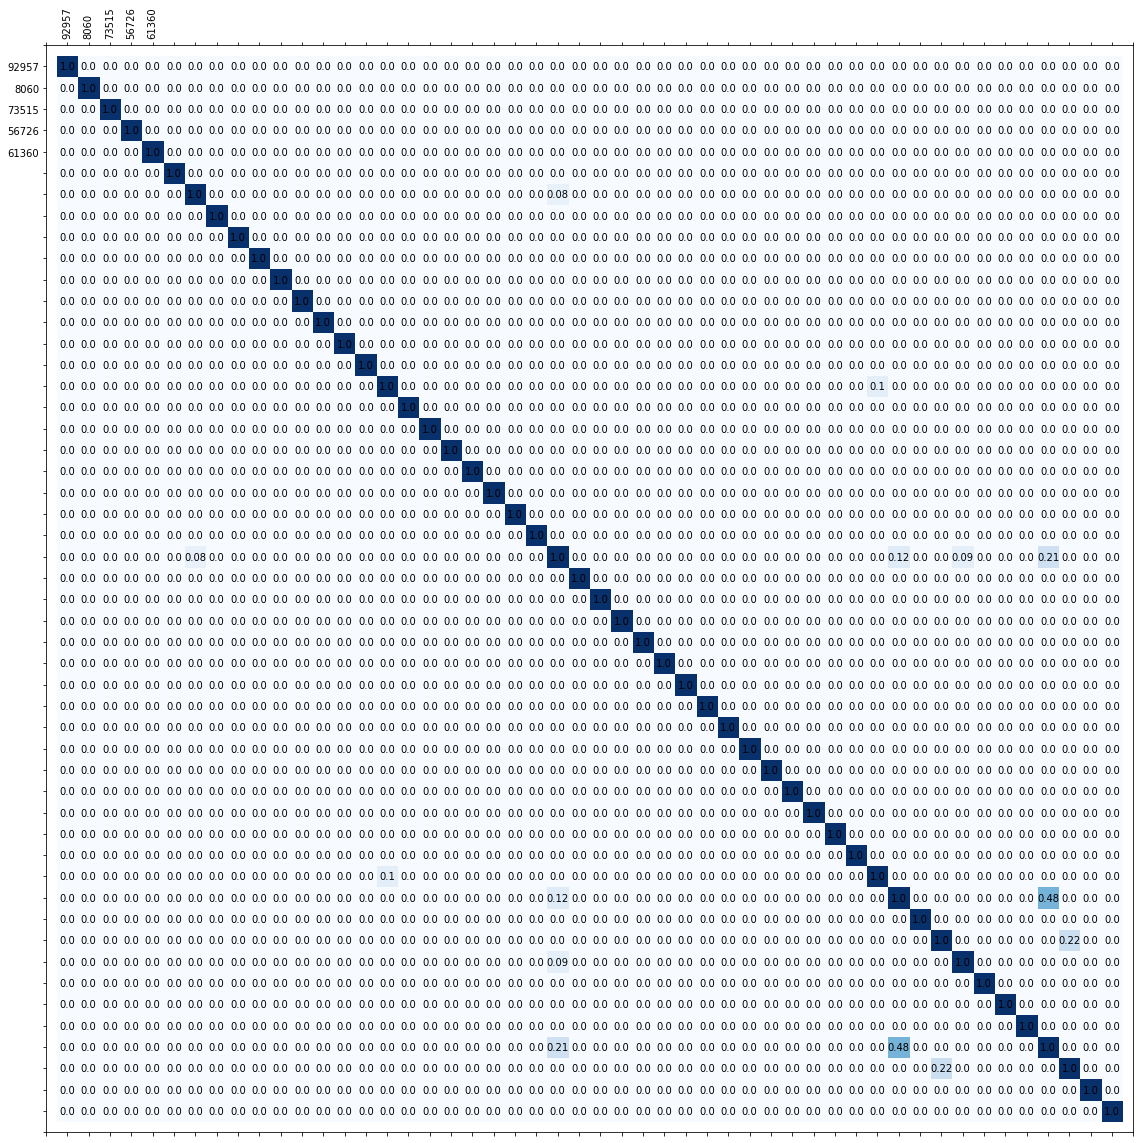

In [62]:
clust = 11
ids = np.array(sample)[np.where(np.array(clusters) == clust)[0]]
clust_dict = dd.dict_by_ids(article_df,  bad_ids_unique)
clust_sim_mat = dd.similarity_mat(clust_dict)
utils.display_mat(clust_sim_mat, xlabs = list(ids))

In [41]:
id1 = sample[2]
id2 = sample[337]
doc1 = article_dict[id1]
doc2 = article_dict[id2]
jac_mat = dd.get_jaccard_matrix(doc1, doc2)
dd.jaccard_score()
print(doc1, "\n\n\n")
print(doc2)

Error 403 : Access Denied
 The access to this location           (/days-gone/File:DG_-_Belknap_023.jpg)         is denied.              
 Otherwise, please return to the page you were at before. 



Error 403 : Access Denied
 The access to this location          (/pathologic-2/walkthrough/Day_11)         is denied.              
 Otherwise, please return to the page you were at before.


In [42]:
print(dd.print_sentence_matches(visualize = True))


S 0 : Error 403 : 

	T 0 1.0 -1.0 : Error 403 : 

Jaccard Index: 1.0 with counts False
I: {'403', 'error'}
A-B: set() 
B-A: set()
Entities: 
-1

S 1 : Access Denied 

	T 1 1.0 -1.0 : Access Denied 

Jaccard Index: 1.0 with counts False
I: {'denied', 'access'}
A-B: set() 
B-A: set()
Entities: 
-1

S 2 :  The access to this location           

	T 2 0.56 -1.0 :  The access to this location          (/pathologic-2/walkthrough/Day_11)         is denied.               

Jaccard Index: 0.5555555555555556 with counts False
I: {'location', 'the', 'to', 'access', 'this'}
A-B: set() 
B-A: {'be', '/pathologic-2/walkthrough', 'deny', 'day_11'}
Entities: 
-1

S 4 :  Otherwise, please return to the page you were at before. 

	T 3 1.0 -1.0 :  Otherwise, please return to the page you were at before. 

Jaccard Index: 1.0 with counts False
I: {'before', 'the', 'be', 'return', 'otherwise', 'please', 'to', 'you', 'page', 'at'}
A-B: set() 
B-A: set()
Entities: 
-1
[[0, 0], [1, 1], [2, 2], [4, 3]]


In [43]:
print(dd.jaccard_score(), dd.jaccard_score(weighted = False))
print(np.sum(dd.jaccard_mat * dd.jaccard_matches * dd.weight_mat * abs(dd.entities_mat)))
print(np.sum(np.max(dd.weight_mat, axis = 0)))
np.sum(dd.jaccard_mat * dd.jaccard_matches), np.min(dd.weight_mat.shape)

0.8412698412698414 0.8888888888888888
1.1777777777777778
1.4


(3.5555555555555554, 4)

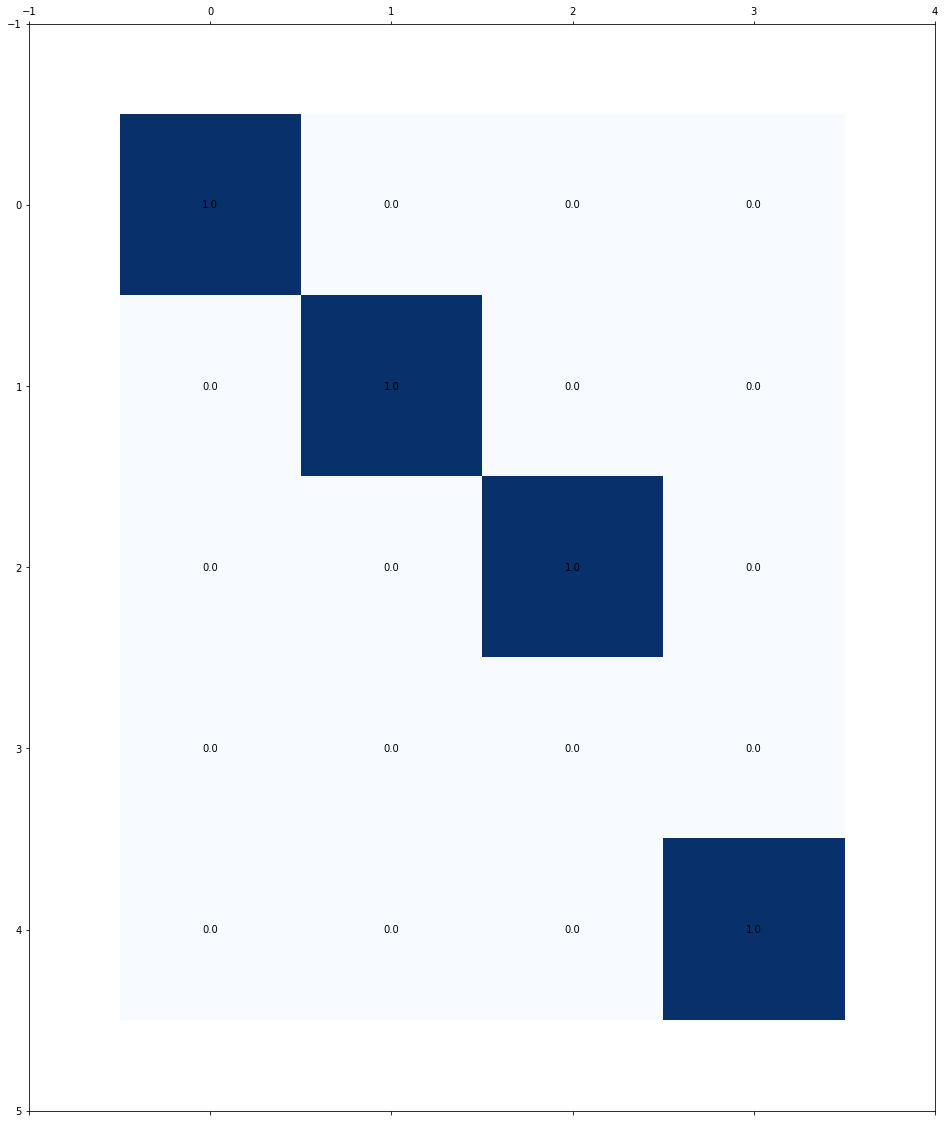

In [44]:
utils.display_mat(abs(dd.entities_mat))

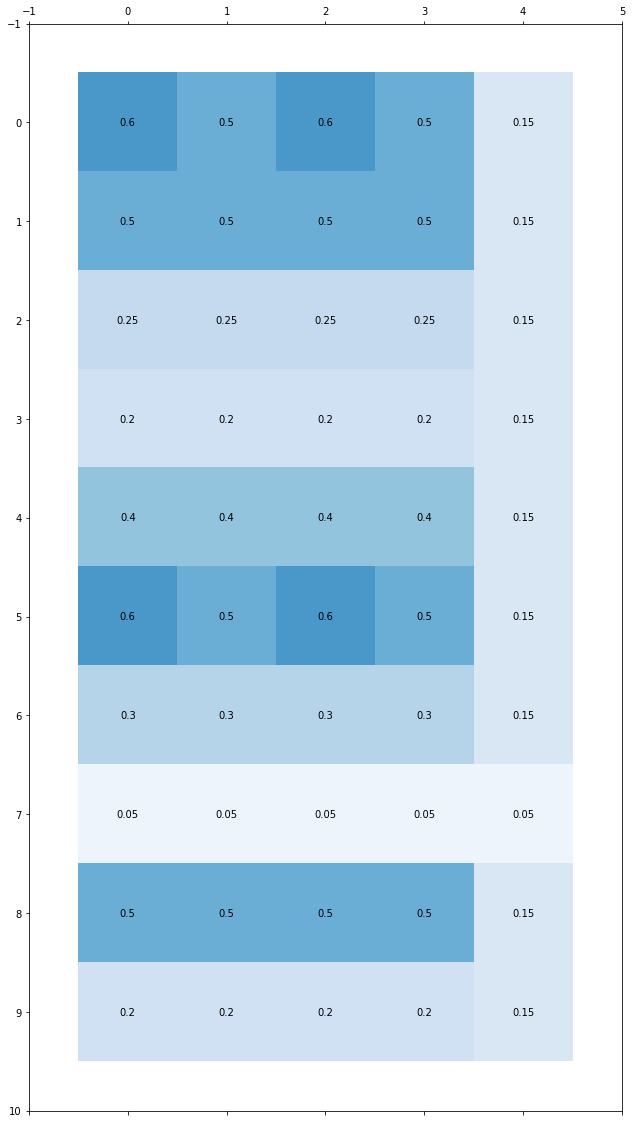

In [13]:
utils.display_mat(dd.weight_mat)

In [ ]:
N = len(article_df)
N_top50 = np.sum(1 - np.isnan(article_df["event"]))
print("Number of singletons: %d" % len(events['singletons']))
print("Number of articles clustered into top 50 events: %d/%d (.%d)" % (N_top50, N, round(N_top50/N, 2) * 100))
N_clustered = N - len(events['singletons'])
print("Number of non-singletons clustered into top 50 events: %d/%d (.%d)" % (N_top50, N_clustered, round(N_top50/N_clustered, 2) * 100))

In [ ]:
dd = comparisons.DuplicationDetection()
comparer = machine.MultiComparisons()
n = 50
sample = random.sample(list(article_df["id"]), n)
article_dict = dd.dict_by_ids(article_df, sample, para_sep = "\n")

n_paras = [len(np.unique(article_dict[id].sent_para_map)) for id in article_dict.keys()]
n_sentences = [len(article_dict[id].get_sentences()) for id in article_dict.keys()]
n_chars = [len(str(article_dict[id])) for id in article_dict.keys()]

plt.subplots(figsize = (12, 8))

plt.subplot(2, 2, 1)
plt.hist(n_paras)
plt.title("Number of paragraphs in %d sample articles" % n)

plt.subplot(2, 2, 2)
plt.hist(n_sentences)
plt.title("Number of sentences in %d sample articles" % n)

plt.subplot(2, 2, 3)
plt.hist(n_chars)
plt.title("Number of characters in %d sample articles" % n)

plt.subplot(2, 2, 4)
plt.hist([n_chars[i]/max(n_sentences[i], 1) for i in range(len(n_chars))])
plt.title("Number of characters per sentence in %d sample articles" % n)

In [ ]:
plt.hist([n_sentences[i]/max(n_paras[i], 1) for i in range(len(n_chars))], bins = 30)
plt.title("Number of sentences per paragraph in %d sample articles" % n)

In [ ]:
bad_prop = [np.mean(article_df.loc[article_df["event"] == i, "paywall"] > 0) for i in np.unique(article_df["event"].dropna())]

In [ ]:
bad_prop = [np.mean(article_df.loc[article_df["event"] == i, "paywall"] > 0) for i in event_names]
plt.bar(event_names, bad_prop)
plt.title("Percentage of 'bad' articles detected per Event cluster")
bad_events = event_names[np.where(np.array(bad_prop) > 0.25)]
print([(i, bad_prop[np.where(event_names == i)[0][0]]) for i in bad_events])

bad_n = [np.sum(article_df.loc[article_df["event"] == i, "paywall"] > 0) for i in event_names]
good_n = [np.sum(article_df.loc[article_df["event"] == i, "paywall"] == 0) for i in event_names]
plt.figure()
plt.bar(event_names, bad_n)
plt.bar(event_names, good_n)
plt.legend(["# Bad articles", "# Good articles"])
plt.title("Number of 'good' and 'bad' articles per Event cluster")

In [ ]:
start = time.time()
print("For 'bad' events (> .25 bad articles)")
for event in bad_events:
    event_df = article_df.loc[article_df["event"] == event, ]
    bad_articles = list(event_df.loc[event_df["paywall"] > 0, "id"])
    print("\n###\nProcessing event %d with %d/%d bad articles, %.2fs elapsed\n###\n" % (event, len(bad_articles), len(event_df), time.time() - start))
    bad_dict = dd.dict_by_ids(article_df, random.sample(bad_articles, min(50, len(bad_articles))))
    sim_mat = dd.similarity_mat(bad_dict)
    plt.figure()
    plt.title("Groups of 'bad' articles (%.2f of cluster) in event %d sample (Unique = %.2f)" % (len(bad_articles)/len(event_df), event, dd.prop_unique_clusters()))
    dd.cluster_articles(sim_mat, plot = True)
    print("\nEvent %d unique bad article examples:" % (event))
    clusters = dd.get_cluster_assignments()
    for i in np.unique(clusters):
        print("\nEX%d" % (i), event_df.loc[event_df["id"] == bad_articles[np.where(clusters == i)[0][0]], "text"].iloc[0])

In [ ]:
start = time.time()
print("For 'good' events")
for event in set(event_names) - set(bad_events):
    event_df = article_df.loc[article_df["event"] == event, ]
    bad_articles = list(event_df.loc[event_df["paywall"] > 0, "id"])
    print("\n###\nProcessing event %d with %d/%d bad articles, %.2fs elapsed\n###\n" % (event, len(bad_articles), len(event_df), time.time() - start))
    bad_dict = dd.dict_by_ids(article_df, random.sample(bad_articles, min(50, len(bad_articles))))
    sim_mat = dd.similarity_mat(bad_dict)
    plt.figure()
    dd.cluster_articles(sim_mat, plot = True)
    plt.title("Groups of 'bad' articles (%.2f of cluster) in event %d sample (Unique = %.2f)" % (len(bad_articles)/len(event_df), event, dd.prop_unique_clusters()))
    print("\nEvent %d unique bad article examples:" % (event))
    clusters = dd.get_cluster_assignments()
    for i in np.unique(clusters):
        print("\nEX%d\n" % (i), event_df.loc[event_df["id"] == bad_articles[np.where(clusters == i)[0][0]], "text"].iloc[0])

In [ ]:
# For articles not in the top 50 events:
bad_prop = np.mean(article_df.loc[np.isnan(article_df["event"]), "paywall"] > 0)
bad_n = np.sum(article_df.loc[np.isnan(article_df["event"]), "paywall"] > 0) 
good_n = np.sum(article_df.loc[np.isnan(article_df["event"]), "paywall"] == 0)
print("For articles not in the top 50 events, %d/%d bad articles (%.2f)" % (bad_n, bad_n + good_n, bad_n/(bad_n+good_n)))